6.Integration of Weather Data

6.1 Correlation Analysis

before pandemic

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_before_pandemic.csv')

# Selecting the relevant columns for analysis
# Assuming the relevant columns are 'AVAILABLE BIKES', 'TEMPERATURE', 'WIND SPEED', 'HUMIDITY', 'CLOUD COVER', and 'SOLAR RADIATION'
selected_columns = ['AVAILABLE BIKES', 'temp', 'windspeed', 'humidity', 'cloudcover', 'solarradiation']
analysis_data = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = analysis_data.corr()

# Print the correlation matrix
print(correlation_matrix)


                 AVAILABLE BIKES      temp  windspeed  humidity  cloudcover  \
AVAILABLE BIKES         1.000000  0.005625  -0.000946  0.005628   -0.000319   
temp                    0.005625  1.000000  -0.135605 -0.219050    0.255830   
windspeed              -0.000946 -0.135605   1.000000 -0.083162    0.059569   
humidity                0.005628 -0.219050  -0.083162  1.000000    0.254095   
cloudcover             -0.000319  0.255830   0.059569  0.254095    1.000000   
solarradiation         -0.000218  0.496421  -0.198568 -0.567516   -0.298568   

                 solarradiation  
AVAILABLE BIKES       -0.000218  
temp                   0.496421  
windspeed             -0.198568  
humidity              -0.567516  
cloudcover            -0.298568  
solarradiation         1.000000  


during pandemic

In [4]:
# Load the dataset
data = pd.read_csv('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_during_pandemic.csv')

# Selecting the relevant columns for analysis
# Assuming the relevant columns are 'AVAILABLE BIKES', 'TEMPERATURE', 'WIND SPEED', 'HUMIDITY', 'CLOUD COVER', and 'SOLAR RADIATION'
selected_columns = ['AVAILABLE BIKES', 'temp', 'windspeed', 'humidity', 'cloudcover', 'solarradiation']
analysis_data = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = analysis_data.corr()

# Print the correlation matrix
print(correlation_matrix)

                 AVAILABLE BIKES      temp  windspeed  humidity  cloudcover  \
AVAILABLE BIKES         1.000000  0.001285  -0.002815  0.028300    0.018835   
temp                    0.001285  1.000000  -0.159513 -0.070797    0.087905   
windspeed              -0.002815 -0.159513   1.000000 -0.082687    0.116917   
humidity                0.028300 -0.070797  -0.082687  1.000000    0.407256   
cloudcover              0.018835  0.087905   0.116917  0.407256    1.000000   
solarradiation         -0.033140  0.471360  -0.214457 -0.622486   -0.469874   

                 solarradiation  
AVAILABLE BIKES       -0.033140  
temp                   0.471360  
windspeed             -0.214457  
humidity              -0.622486  
cloudcover            -0.469874  
solarradiation         1.000000  


after pandemic

In [5]:
# Load the dataset
data = pd.read_csv('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_after_pandemic.csv')

# Selecting the relevant columns for analysis
# Assuming the relevant columns are 'AVAILABLE BIKES', 'TEMPERATURE', 'WIND SPEED', 'HUMIDITY', 'CLOUD COVER', and 'SOLAR RADIATION'
selected_columns = ['AVAILABLE BIKES', 'temp', 'windspeed', 'humidity', 'cloudcover', 'solarradiation']
analysis_data = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = analysis_data.corr()

# Print the correlation matrix
print(correlation_matrix)

                 AVAILABLE BIKES      temp  windspeed  humidity  cloudcover  \
AVAILABLE BIKES         1.000000 -0.002803   0.002961  0.007623    0.006098   
temp                   -0.002803  1.000000  -0.067637 -0.333191    0.117161   
windspeed               0.002961 -0.067637   1.000000  0.000765    0.094946   
humidity                0.007623 -0.333191   0.000765  1.000000    0.296322   
cloudcover              0.006098  0.117161   0.094946  0.296322    1.000000   
solarradiation         -0.008902  0.575837  -0.221839 -0.603145   -0.275108   

                 solarradiation  
AVAILABLE BIKES       -0.008902  
temp                   0.575837  
windspeed             -0.221839  
humidity              -0.603145  
cloudcover            -0.275108  
solarradiation         1.000000  


7.Comparative Analysis

7.1 Year-over-Year Comparisons/Daypart Analysis

In [7]:
import pandas as pd

# Function to perform Year-over-Year Comparison
def year_over_year_comparison(data):
    # Extract year and month
    data['Year'] = data['DATE'].dt.year
    data['Month'] = data['DATE'].dt.month

    # Group by year and month and calculate the mean of available bikes
    grouped = data.groupby(['Year', 'Month'])['AVAILABLE BIKES'].mean()
    
    # Pivot table for better readability
    pivot_table = grouped.unstack(level=0)
    
    return pivot_table

# Function to perform Daypart Analysis
def daypart_analysis(data):
    # Assume TIME column is in the format 'HH:MM:SS' and extract hour
    data['Hour'] = pd.to_datetime(data['TIME']).dt.hour
    
    # Group by hour and calculate the mean of available bikes
    hourly_means = data.groupby('Hour')['AVAILABLE BIKES'].mean()
    
    return hourly_means

# Assuming that 'DATE' and 'TIME' columns exist and 'AVAILABLE BIKES' is the target column
# Load the datasets (replace 'your_file_path' with the actual file paths)
before_pandemic_data = pd.read_csv('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_before_pandemic.csv', parse_dates=['DATE'])
during_pandemic_data = pd.read_csv('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_during_pandemic.csv', parse_dates=['DATE'])
after_pandemic_data = pd.read_csv('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_after_pandemic.csv', parse_dates=['DATE'])

# Perform Year-over-Year Comparisons
yoy_before = year_over_year_comparison(before_pandemic_data)
yoy_during = year_over_year_comparison(during_pandemic_data)
yoy_after = year_over_year_comparison(after_pandemic_data)

# Perform Daypart Analysis
daypart_before = daypart_analysis(before_pandemic_data)
daypart_during = daypart_analysis(during_pandemic_data)
daypart_after = daypart_analysis(after_pandemic_data)

# Print results
print("Year-over-Year Comparison Before Pandemic:")
print(yoy_before)
print("\nYear-over-Year Comparison During Pandemic:")
print(yoy_during)
print("\nYear-over-Year Comparison After Pandemic:")
print(yoy_after)

print("\nDaypart Analysis Before Pandemic:")
print(daypart_before)
print("\nDaypart Analysis During Pandemic:")
print(daypart_during)
print("\nDaypart Analysis After Pandemic:")
print(daypart_after)

C:\Users\M2-Winterfell\AppData\Local\Temp\ipykernel_17732\3994970666.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['TIME']).dt.hour
C:\Users\M2-Winterfell\AppData\Local\Temp\ipykernel_17732\3994970666.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['TIME']).dt.hour
C:\Users\M2-Winterfell\AppData\Local\Temp\ipykernel_17732\3994970666.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['TIME']).dt.hour


Year-over-Year Comparison Before Pandemic:
Year        2018       2019       2020
Month                                 
1            NaN  11.205521  11.395518
2            NaN  10.928324  11.497406
3            NaN  10.930537        NaN
4            NaN  11.010450        NaN
5            NaN  11.390821        NaN
6            NaN  11.609088        NaN
7            NaN  11.512660        NaN
8      11.350859  11.469611        NaN
9      11.403601  11.823486        NaN
10     11.084916  11.644651        NaN
11     11.124050  11.719160        NaN
12     11.363840  11.491562        NaN

Year-over-Year Comparison During Pandemic:
Year        2020       2021       2022
Month                                 
1            NaN  10.273668  12.741410
2            NaN  11.322556  12.769690
3      11.900582  10.449100  12.644188
4      10.018082  11.344252  12.591041
5       9.990041  12.171639  12.247172
6      10.999392  11.995148        NaN
7      10.846280  12.124353        NaN
8      11.708680

8.User Behavior Analysis

8.1 Cluster Analysis/Usage Patterns

c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


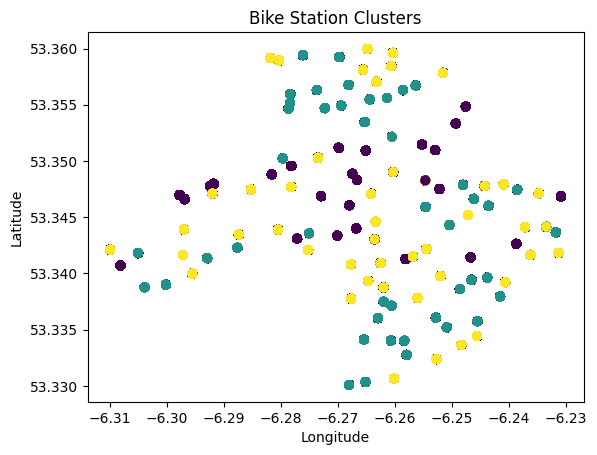

c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


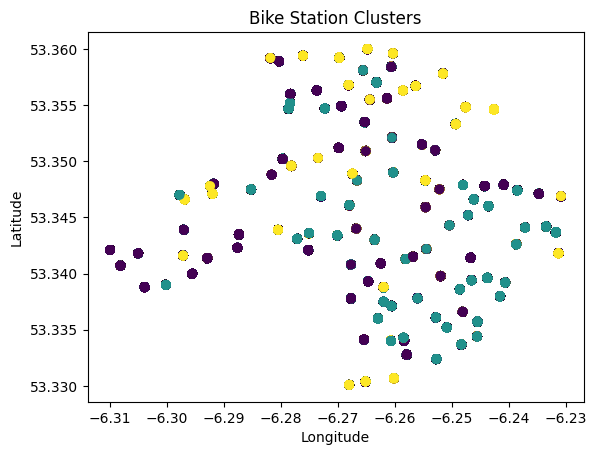

c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


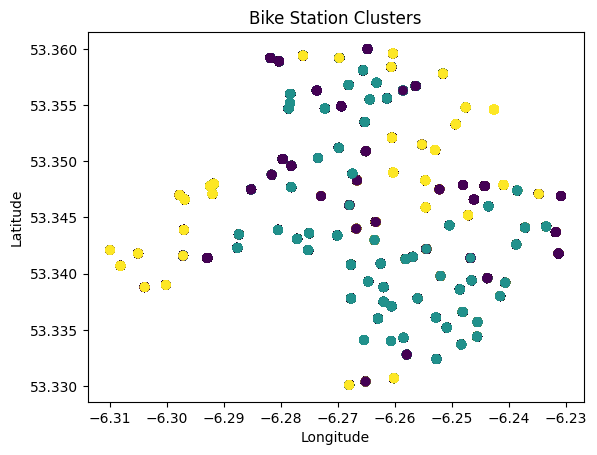

Average bike usage before pandemic: -0.2786210547479032
Average bike usage during pandemic: -0.256700468203343
Average bike usage after pandemic: -0.2391565463923317


In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the datasets
before_pandemic = pd.read_csv('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_before_pandemic.csv')
during_pandemic = pd.read_csv('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_during_pandemic.csv')
after_pandemic = pd.read_csv('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_after_pandemic.csv')

# Function to preprocess and cluster data
def cluster_stations(data):
    # Assuming BIKE USAGE column reflects usage patterns
    features = data[['LONGITUDE', 'LATITUDE', 'BIKE USAGE']]
    
    # Apply clustering - number of clusters can be chosen based on domain knowledge or methods like the elbow method
    kmeans = KMeans(n_clusters=3)
    data['cluster'] = kmeans.fit_predict(features)
    
    # Plot the clusters
    plt.scatter(data['LONGITUDE'], data['LATITUDE'], c=data['cluster'], cmap='viridis')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Bike Station Clusters')
    plt.show()

    return data

# Function to analyze usage patterns
def analyze_usage(before, during, after):
    # Here you might calculate statistics or visualize changes over time
    # For example, calculate the mean usage before, during, and after the pandemic
    mean_usage_before = before['BIKE USAGE'].mean()
    mean_usage_during = during['BIKE USAGE'].mean()
    mean_usage_after = after['BIKE USAGE'].mean()
    
    return mean_usage_before, mean_usage_during, mean_usage_after

# Cluster each period's data
before_pandemic_clustered = cluster_stations(before_pandemic)
during_pandemic_clustered = cluster_stations(during_pandemic)
after_pandemic_clustered = cluster_stations(after_pandemic)

# Analyze usage patterns
usage_before, usage_during, usage_after = analyze_usage(before_pandemic, during_pandemic, after_pandemic)
print(f'Average bike usage before pandemic: {usage_before}')
print(f'Average bike usage during pandemic: {usage_during}')
print(f'Average bike usage after pandemic: {usage_after}')
